In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

In [18]:
df = pd.read_csv("auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [19]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [20]:
df[df['horsepower'].str.isdigit() == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [21]:
df.replace({'?':np.NAN},inplace=True)

In [26]:
df['horsepower'] = df['horsepower'].astype('float64')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [28]:
df['horsepower'].fillna(df['horsepower'].median(),inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


C:\Users\abhis\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\abhis\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


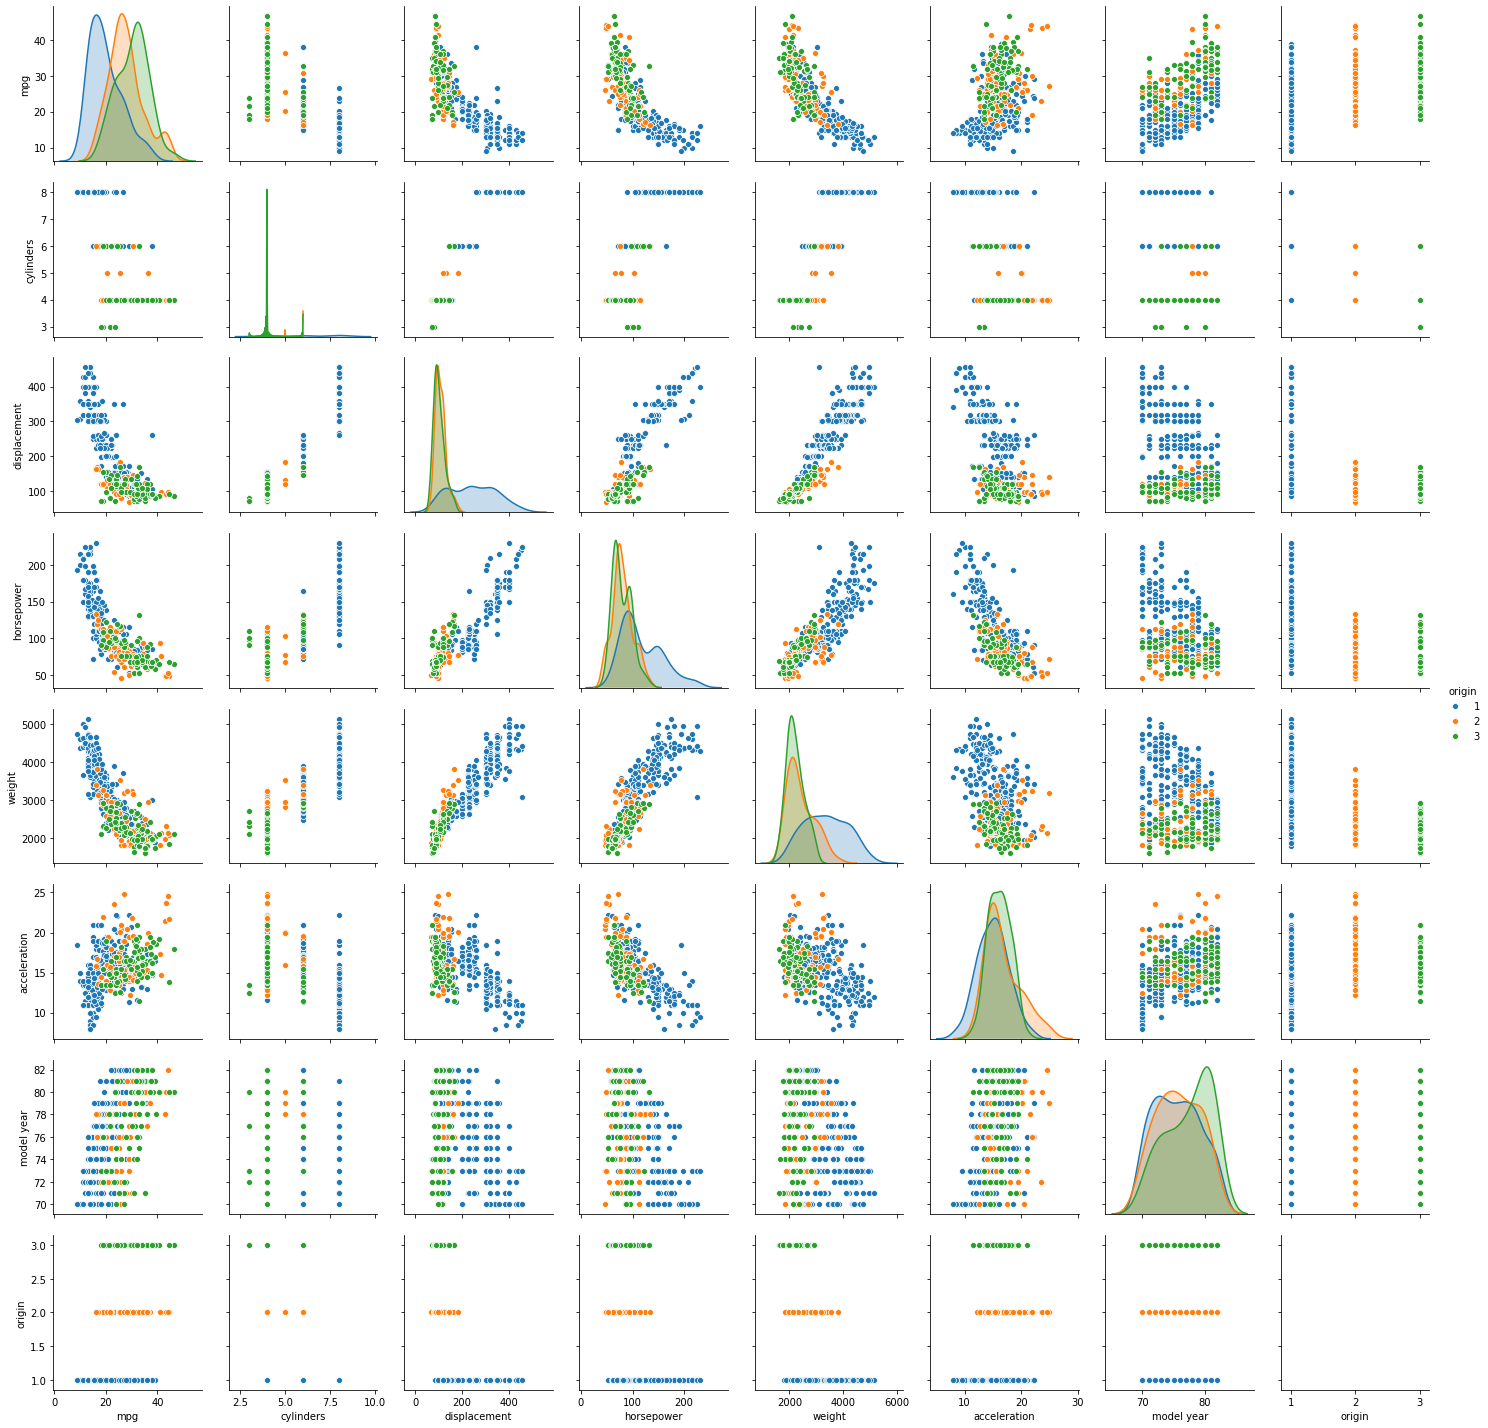

In [30]:
sns.pairplot(df,diag_kind='kde',hue='origin')

In [32]:
from scipy.stats import zscore

df_attr = df.loc[:,'mpg':'origin']
df_attr_z = df_attr.apply(zscore)

df_attr_z.drop(['origin','model year'],axis=1,inplace=True)

array = df_attr_z.values

In [38]:
cluster_range = range(2,6)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=5)
    clusters.fit(df_attr)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

cluster_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
cluster_df

,num_clusters,cluster_errors
0,2,7.428960e+07
1,3,3.420817e+07
2,4,1.905688e+07
3,5,1.375973e+07


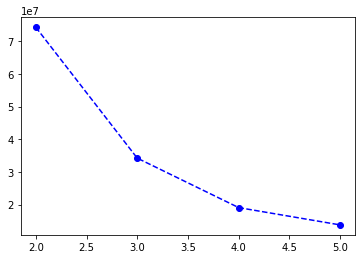

In [39]:
plt.plot(cluster_df["num_clusters"],cluster_df['cluster_errors'],'bo--')

In [40]:
cluster = KMeans(n_clusters=4,random_state=45)
cluster.fit(df_attr_z)
df_attr_z_copy = df_attr_z.copy(deep=True)

In [41]:
centroids = cluster.cluster_centers_
centroids

array([[ 0.99149249, -0.81998551, -0.85895557, -0.91817479, -0.85174625,
         1.21960744],
       [-0.51001261,  0.40212541,  0.29436282, -0.08700192,  0.32691222,
         0.34920732],
       [-1.15110476,  1.4860546 ,  1.48450715,  1.50624078,  1.38753374,
        -1.06267868],
       [ 0.56930351, -0.84746902, -0.75211548, -0.48243632, -0.70707286,
        -0.19616096]])

In [42]:
centroid_df = pd.DataFrame(centroids,columns=df_attr_z.columns)
centroid_df

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,0.991492,-0.819986,-0.858956,-0.918175,-0.851746,1.219607
1,-0.510013,0.402125,0.294363,-0.087002,0.326912,0.349207
2,-1.151105,1.486055,1.484507,1.506241,1.387534,-1.062679
3,0.569304,-0.847469,-0.752115,-0.482436,-0.707073,-0.196161


In [43]:
prediction  = cluster.predict(df_attr_z)
df_attr_z['Group'] = prediction

C:\Users\abhis\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\abhis\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\abhis\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or s

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002714B1EEF88>,
      dtype=object)

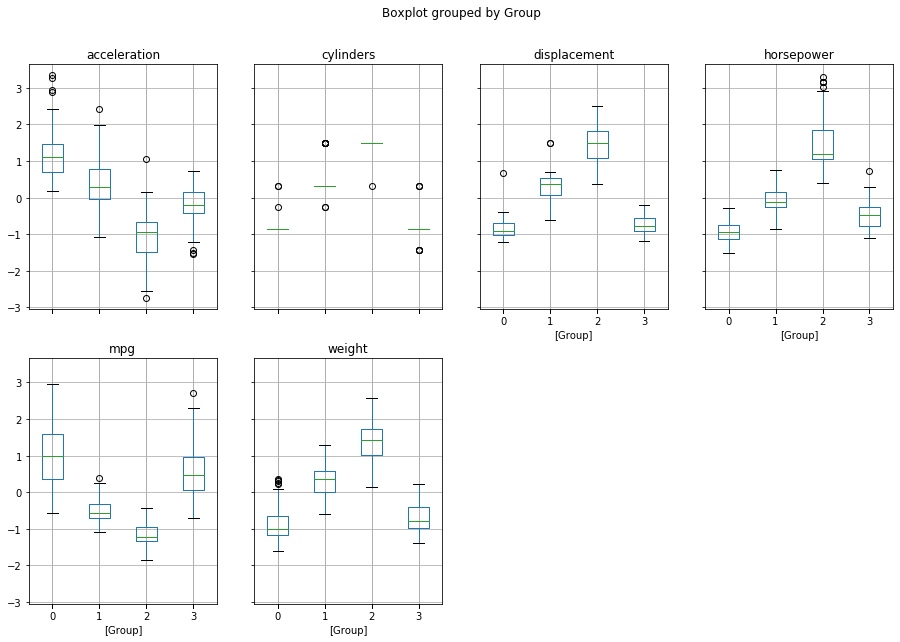

In [44]:
df_attr_z.boxplot(by='Group',layout=(2,4),figsize=(15,10))

In [ ]:
data = df_attr_z

def replace(group):
    